## REGRESION LINEAL

In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import math 

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

# Gráficos
# ==============================================================================
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Asunciones y Preprocesamiento
# ==============================================================================
from scipy import stats
import math
from scipy.stats import levene
import researchpy as rp
from sklearn.preprocessing import StandardScaler
import itertools

# ANOVA
# ==============================================================================
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.multivariate.manova import MANOVA


#Linear Regresion con Sklearn
# ==============================================================================
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics




# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')


# Tamaño gráficas
# ==============================================================================
plt.rcParams["figure.figsize"] = (10,8)

In [2]:
df= pd.read_csv("Bicicletas_limpio.csv", index_col = 0)
df.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801


In [3]:
df.set_index('instant')

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,27-12-2019,spring,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
727,28-12-2019,spring,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
728,29-12-2019,spring,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341


In [4]:
df.dtypes

instant         int64
dteday         object
season         object
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [5]:
df['mnth'] = df['mnth'].astype('category')
df['yr'] = df['yr'].astype('category')
df['holiday'] = df['holiday'].astype('category')

In [6]:
df.dtypes

instant          int64
dteday          object
season          object
yr            category
mnth          category
holiday       category
weekday          int64
workingday       int64
weathersit       int64
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual           int64
registered       int64
cnt              int64
dtype: object

## REEMPLAZAR OUTLIERS

In [7]:
df_sin_outliers= df.copy()

In [8]:
df_sin_outliers.set_index('instant')

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,27-12-2019,spring,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
727,28-12-2019,spring,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
728,29-12-2019,spring,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341


In [9]:
def detectar_outliers(lista_columnas, df_sin_outliers): 
    
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = df_sin_outliers[(df_sin_outliers[col] < Q1 - outlier_step) | (df_sin_outliers[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        

    
    return dicc_indices 

In [10]:
columnas_numeric = df.select_dtypes(include = np.number)

In [11]:
lista_columnas = list(columnas_numeric)

In [12]:
ind = detectar_outliers(lista_columnas, df_sin_outliers)
print(ind)

{'hum': [49, 68], 'windspeed': [44, 49, 93, 94, 292, 382, 407, 420, 431, 432, 449, 665, 720], 'casual': [148, 183, 184, 196, 246, 281, 440, 446, 454, 455, 461, 468, 469, 475, 489, 496, 503, 504, 510, 511, 512, 517, 518, 524, 531, 532, 538, 539, 549, 559, 567, 580, 594, 608, 609, 616, 622, 629, 630, 636, 643, 657, 664, 679]}


In [13]:
numericas = df_sin_outliers.select_dtypes(include = np.number)

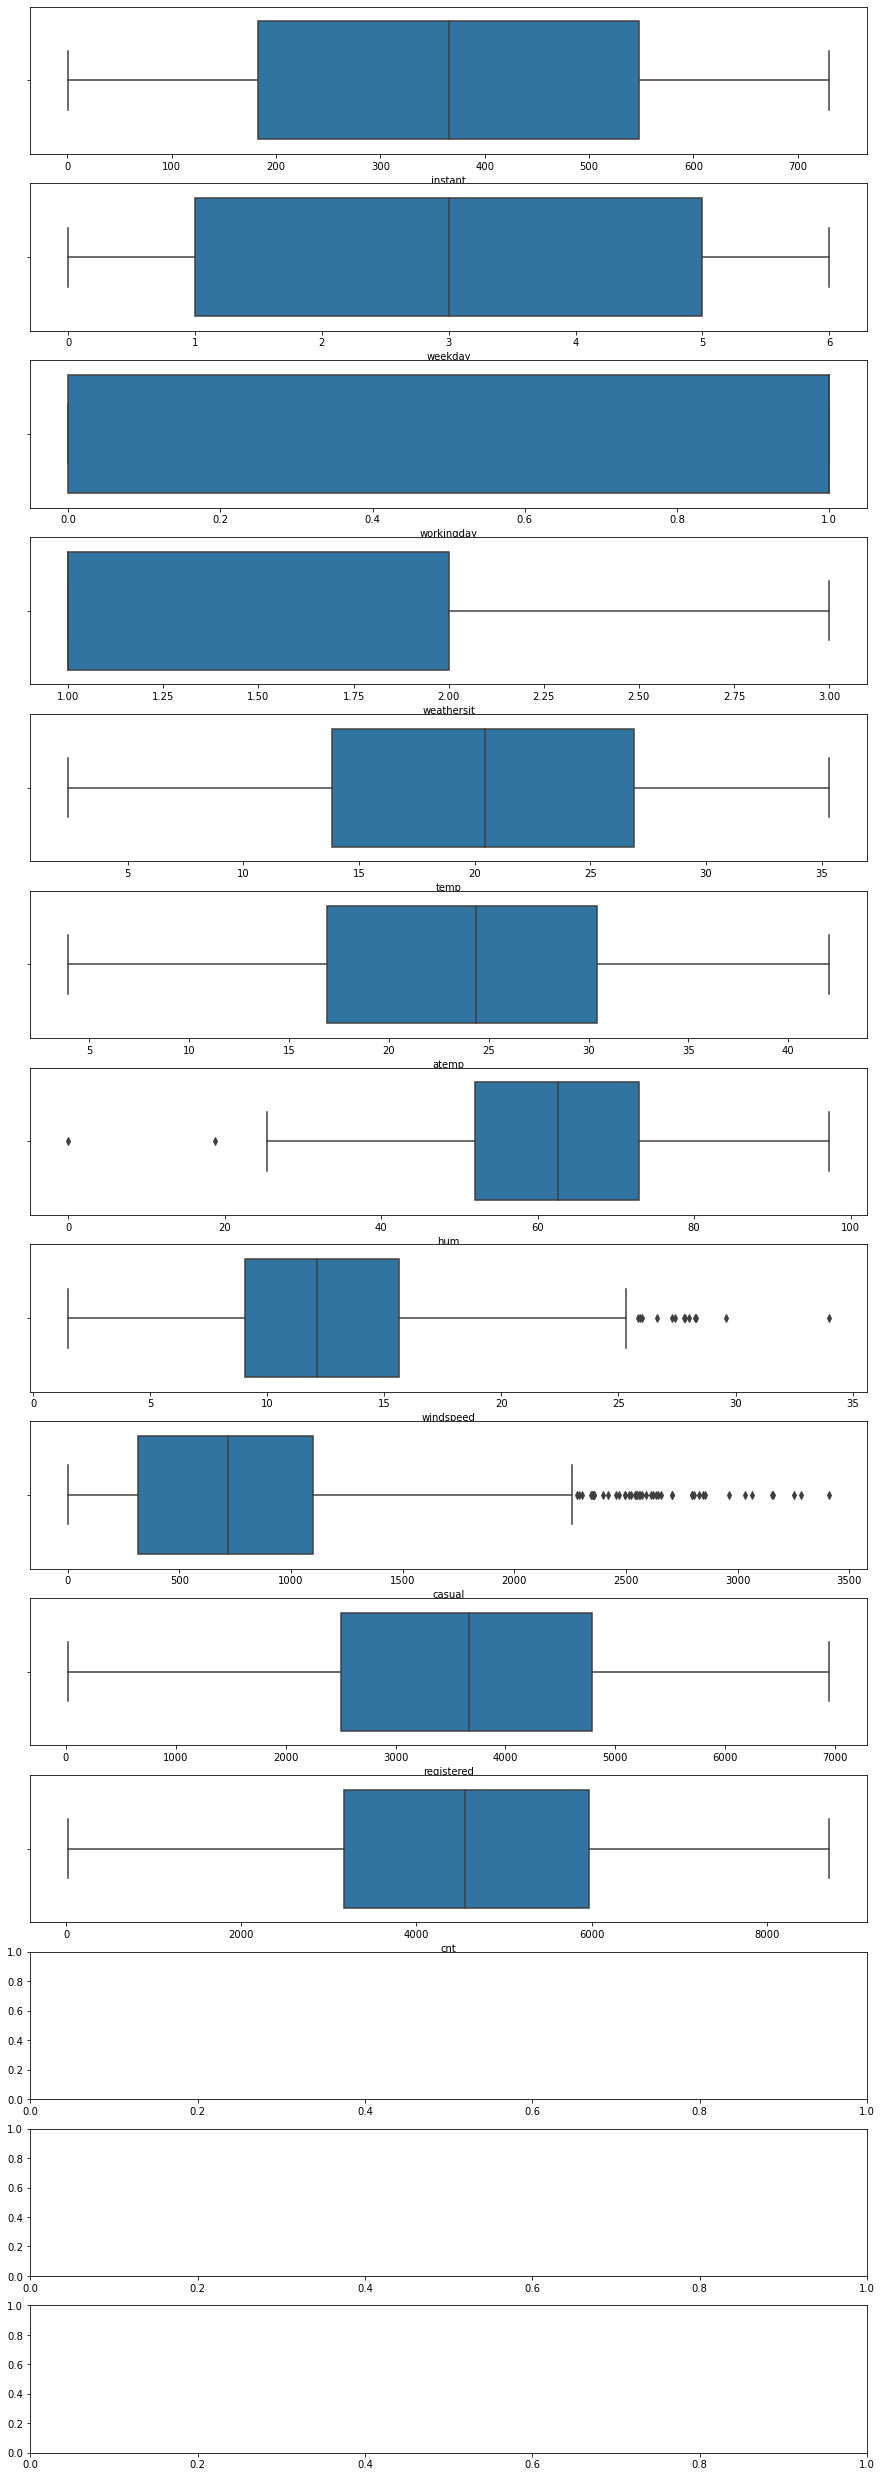

In [14]:
fig, axes = plt.subplots(14, 1, figsize=(15,45))

for i, col in enumerate(columnas_numeric):
    sns.boxplot(x = numericas.columns[i], data = df_sin_outliers, ax=axes[i]); # para trazar una línea de densidad

plt.show()

        Solo tiene sentido reemplzar los outliers de hum y windspeed por la mediana (temperatura no tiene outliers)

In [15]:
for key, values in ind.items():
    median = df_sin_outliers[key].median()
     
    if key == "hum" or key == 'windspeed':
        for i in values: 
            df_sin_outliers.loc[i,key] = median
    else:
        pass

# Hacemos el tratamiento de las variables categoricas
1. Encoding para la variable season
2. Eliminamos la variable date
3. Ponemos como categoricas las columnas:
- yr
- mnth
- holiday
- weekday
- workingday
- weathersit

In [16]:
## Cambio tipo variable

df_sin_outliers["yr"] = df_sin_outliers["yr"].astype('category')
df_sin_outliers["mnth"] = df_sin_outliers["mnth"].astype('category')
df_sin_outliers["holiday"] = df_sin_outliers["holiday"].astype('category')

In [17]:
df_sin_outliers["weekday"] = df_sin_outliers["weekday"].astype('category')
df_sin_outliers["workingday"] = df_sin_outliers["workingday"].astype('category')
df_sin_outliers["weathersit"] = df_sin_outliers["weathersit"].astype('category')

In [18]:
mapa_season = {"spring": 0,"summer": 1, "autumn": 2, "winter": 3} #asigno a cada estacion un valor
df_sin_outliers["season"] = df_sin_outliers["season"].map(mapa_season)#asigno a la columna los valores

In [19]:
df_sin_outliers.season.unique()#comprobamos que remplazamos los valores de forma correcta

array([0, 1, 2, 3])

In [20]:
## Eliminamos las columnas q no usaremos
df_sin_outliers.drop(columns = ['dteday', "instant"],inplace=True)

In [21]:
df_sin_outliers.to_csv('df_sin_outliers.csv')

# Comprobación de las asunciones

## Asunción de normalidad

| Test Shapiro  |  Resultado | Conclusión |
|---|---|---|
|  p-value > 0.05 | No significativo   | Datos  Normales|
|p-value < 0.05| Significativo| Datos No Normales |

In [22]:
stats.shapiro(df_sin_outliers["casual"])

ShapiroResult(statistic=0.8850967288017273, pvalue=7.660028716313278e-23)

In [23]:
df_sin_outliers['casual'], lambda_ajustada = stats.boxcox(df_sin_outliers['casual'])

In [24]:
stats.shapiro(df_sin_outliers["casual"])

ShapiroResult(statistic=0.9915913939476013, pvalue=0.000365116517059505)

In [25]:
stats.shapiro(df_sin_outliers["registered"])

ShapiroResult(statistic=0.98438560962677, pvalue=5.023745757171127e-07)

In [26]:
df_sin_outliers['registered'], lambda_ajustada = stats.boxcox(df_sin_outliers['registered'])# usamos el boxcoc

In [27]:
stats.shapiro(df_sin_outliers["registered"])

ShapiroResult(statistic=0.9854231476783752, pvalue=1.1639369859040016e-06)

In [28]:
stats.shapiro(df_sin_outliers["cnt"])

ShapiroResult(statistic=0.9802490472793579, pvalue=2.313480784721378e-08)

In [29]:
df_sin_outliers['cnt'], lambda_ajustada = stats.boxcox(df_sin_outliers['cnt'])# usamos el boxcoc

In [30]:
stats.shapiro(df_sin_outliers["cnt"])

ShapiroResult(statistic=0.9801719784736633, pvalue=2.1925126603150602e-08)

        Analizando los pvalue de las tres variables que podriamos usar como predictoras: La variable casual es la de mejor resultado muy cercana al valor de normalidad. la segunda opción sería la variable registered y la última seria CNT.

## Asunción de homocedasticidad

Las varianzas no difieren entre las distintas categorías de nuestros datos


| Test Levene  |  Resultado | Conclusión   |
|---|---|---|
|  p-value > 0.05 | No significativo   | Cumple asunción, tienen varianzas similares|
|p-value < 0.05| Significativo| No cumple asunción, no tienen varianzas similares |

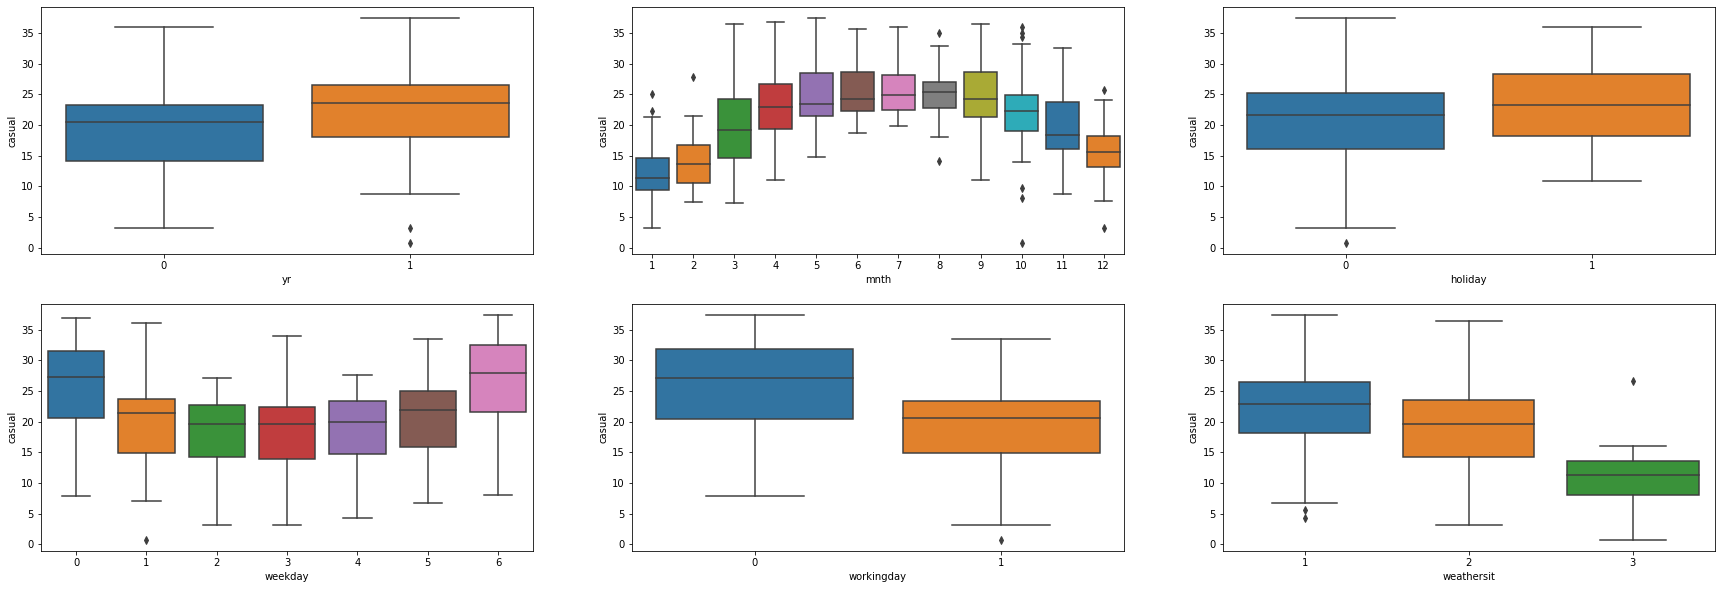

In [31]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (30, 10))

axes = axes.flat

columnas_cat = df_sin_outliers.select_dtypes(include = ["object","category"]).columns

for i, colum in enumerate(columnas_cat):
    sns.boxplot(
    x       = colum,
    y       = 'casual',
    data    = df_sin_outliers,
    palette = 'tab10',
    ax      = axes[i]
    )

In [32]:
# def datos_test_levene(columna, df_sin_outliers):
#     valores = df_sin_outliers[columna].unique()
#     d = {}
#     for x in valores:
#         d["{0}".format(x)] = df_sin_outliers[df_sin_outliers[columna] == x]["casual"]
#     return d

In [33]:
df_numericas = df_sin_outliers.select_dtypes(include=np.number)

In [34]:
resultados_registrados = {}

numer = df_numericas.columns.drop(['registered'])

for col in numer:
    stat, p_valor = levene(df_sin_outliers[col], df_sin_outliers.registered, center='median')

    resultados_registrados[col] = p_valor

In [35]:
resultados_registrados

{'season': 3.5175672739479587e-209,
 'temp': 4.9863609107084916e-204,
 'atemp': 1.4373669749579232e-203,
 'hum': 2.467664730937967e-199,
 'windspeed': 1.4278687462118032e-206,
 'casual': 5.653659905235503e-205,
 'cnt': 2.4509355883718514e-48}

In [36]:
resultados_casuales = {}

numer = df_numericas.columns.drop(['casual'])

for col in numer:
    stat, p_valor = levene(df_sin_outliers[col], df_sin_outliers.casual, center='median')

    resultados_casuales[col] = p_valor

In [37]:
resultados_casuales

{'season': 8.407572761226768e-145,
 'temp': 5.833319378367082e-07,
 'atemp': 4.953287402796698e-12,
 'hum': 2.76832192717856e-66,
 'windspeed': 3.9911094079427444e-19,
 'registered': 5.653659905235503e-205,
 'cnt': 2.2170151637881882e-214}

- Efectivamente comprobamos con el test de levene que ni para registrados ni para casuales, ninguna de las variables son homocedásticas. Es decir, todos los valores son heterogéneos.

In [38]:
df_sin_outliers["season"].unique()

array([0, 1, 2, 3])

In [39]:
primavera = df_sin_outliers[df_sin_outliers["season"] == 0]["registered"]
verano = df_sin_outliers[df_sin_outliers["season"] == 1]["registered"]
otoño = df_sin_outliers[df_sin_outliers["season"] == 2]["registered"]
invierno = df_sin_outliers[df_sin_outliers["season"] == 3]["registered"]

In [40]:
levene_test = stats.levene(primavera, verano, otoño, invierno, center='median')
levene_test

LeveneResult(statistic=0.6146116608173386, pvalue=0.6056733482469111)

In [41]:
primavera = df_sin_outliers[df_sin_outliers["season"] == 0]["casual"]
verano = df_sin_outliers[df_sin_outliers["season"] == 1]["casual"]
otoño = df_sin_outliers[df_sin_outliers["season"] == 2]["casual"]
invierno = df_sin_outliers[df_sin_outliers["season"] == 3]["casual"]

In [42]:
levene_test = stats.levene(primavera, verano, otoño, invierno, center='median')
levene_test

LeveneResult(statistic=5.590787847572371, pvalue=0.0008568904054651623)

In [43]:
levene_region = stats.levene(region['southwest'], region['southeast'], region['northwest'], region['northeast'], center='median')
levene_region

NameError: name 'region' is not defined

In [ ]:
levene_hijos = stats.levene(hijos['1'], hijos['2'], hijos['3'], hijos['4'], hijos['5'],  center='median')
levene_hijos

    NOS SALTAMOS ESTO DE TODAS LAS VARIABLES XQ CON LAS GRÁFICAS YA VIMOS QUE NO SON HOMOCEDASTICIDAD

## Asunción independencia



| Test Independencia |  Resultado | Conclusión   |
|---|---|---|
|  p-value > 0.05 | No significativo   | Cumple asunción, tienen varianzas similares|
|p-value < 0.05| Significativo| No cumple asunción, no tienen varianzas similares |

In [ ]:
columnas = df_sin_outliers.columns
columnas

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [ ]:
combinaciones = list(itertools.combinations(columnas, 2))
combinaciones

[('season', 'yr'),
 ('season', 'mnth'),
 ('season', 'holiday'),
 ('season', 'weekday'),
 ('season', 'workingday'),
 ('season', 'weathersit'),
 ('season', 'temp'),
 ('season', 'atemp'),
 ('season', 'hum'),
 ('season', 'windspeed'),
 ('season', 'casual'),
 ('season', 'registered'),
 ('season', 'cnt'),
 ('yr', 'mnth'),
 ('yr', 'holiday'),
 ('yr', 'weekday'),
 ('yr', 'workingday'),
 ('yr', 'weathersit'),
 ('yr', 'temp'),
 ('yr', 'atemp'),
 ('yr', 'hum'),
 ('yr', 'windspeed'),
 ('yr', 'casual'),
 ('yr', 'registered'),
 ('yr', 'cnt'),
 ('mnth', 'holiday'),
 ('mnth', 'weekday'),
 ('mnth', 'workingday'),
 ('mnth', 'weathersit'),
 ('mnth', 'temp'),
 ('mnth', 'atemp'),
 ('mnth', 'hum'),
 ('mnth', 'windspeed'),
 ('mnth', 'casual'),
 ('mnth', 'registered'),
 ('mnth', 'cnt'),
 ('holiday', 'weekday'),
 ('holiday', 'workingday'),
 ('holiday', 'weathersit'),
 ('holiday', 'temp'),
 ('holiday', 'atemp'),
 ('holiday', 'hum'),
 ('holiday', 'windspeed'),
 ('holiday', 'casual'),
 ('holiday', 'registered'),


In [ ]:
combinaciones_3 = list(itertools.combinations(columnas, 3))
combinaciones_3

[('season', 'yr', 'mnth'),
 ('season', 'yr', 'holiday'),
 ('season', 'yr', 'weekday'),
 ('season', 'yr', 'workingday'),
 ('season', 'yr', 'weathersit'),
 ('season', 'yr', 'temp'),
 ('season', 'yr', 'atemp'),
 ('season', 'yr', 'hum'),
 ('season', 'yr', 'windspeed'),
 ('season', 'yr', 'casual'),
 ('season', 'yr', 'registered'),
 ('season', 'yr', 'cnt'),
 ('season', 'mnth', 'holiday'),
 ('season', 'mnth', 'weekday'),
 ('season', 'mnth', 'workingday'),
 ('season', 'mnth', 'weathersit'),
 ('season', 'mnth', 'temp'),
 ('season', 'mnth', 'atemp'),
 ('season', 'mnth', 'hum'),
 ('season', 'mnth', 'windspeed'),
 ('season', 'mnth', 'casual'),
 ('season', 'mnth', 'registered'),
 ('season', 'mnth', 'cnt'),
 ('season', 'holiday', 'weekday'),
 ('season', 'holiday', 'workingday'),
 ('season', 'holiday', 'weathersit'),
 ('season', 'holiday', 'temp'),
 ('season', 'holiday', 'atemp'),
 ('season', 'holiday', 'hum'),
 ('season', 'holiday', 'windspeed'),
 ('season', 'holiday', 'casual'),
 ('season', 'holida

In [ ]:
for par in combinaciones:
    crosstab, test_results, expected = rp.crosstab(df_sin_outliers[par[0]], df_sin_outliers[par[1]],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")
    print("---------------------------------", par[0], par[1], "---------------------------------")
    print(test_results)

--------------------------------- season yr ---------------------------------
                Chi-square test  results
0  Pearson Chi-square ( 3.0) =       0.0
1                    p-value =       1.0
2                 Cramer's V =       0.0
--------------------------------- season mnth ---------------------------------
                 Chi-square test   results
0  Pearson Chi-square ( 33.0) =   1762.002
1                     p-value =      0.000
2                  Cramer's V =      0.897
--------------------------------- season holiday ---------------------------------
                Chi-square test  results
0  Pearson Chi-square ( 3.0) =    1.5184
1                    p-value =    0.6780
2                 Cramer's V =    0.0456
--------------------------------- season weekday ---------------------------------
                 Chi-square test  results
0  Pearson Chi-square ( 18.0) =    0.4845
1                     p-value =    1.0000
2                  Cramer's V =    0.0149
--------

KeyboardInterrupt: 

    Recordar revisar los p-value 

# Estandarizar

In [ ]:
df_estandarizado= df_sin_outliers.copy()
df_estandarizado

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,0,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,16.397820,267.555885,505.996731
1,0,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,11.472437,273.035135,421.088832
2,0,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,11.076035,453.922956,668.973918
3,0,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,10.613970,522.514924,761.936013
4,0,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,9.475537,541.694947,778.363548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,0,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,14.685846,644.098070,996.622128
726,0,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,20.925026,808.749425,1397.583926
727,0,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,12.387360,439.343039,665.451254
728,0,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,16.988116,515.889859,862.414762


In [ ]:
st = StandardScaler()
x_tranformadas = pd.DataFrame(st.fit_transform(columnas_numeric))
x_tranformadas.columns = columnas_numeric.columns
df_estandarizado[x_tranformadas.columns] = x_tranformadas
df_estandarizado.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,instant
0,0,0,1,0,1.497785,-1.469753,1.112127,-0.827613,-0.680818,1.252343,-0.387833,-0.755455,-1.927745,-1.820972,-1.729680
1,0,0,1,0,-1.495052,-1.469753,1.112127,-0.722069,-0.741507,0.480996,0.748899,-1.046996,-1.917480,-1.916078,-1.724934
2,0,0,1,0,-0.996246,0.680387,-0.724644,-1.635432,-1.750344,-1.338073,0.745931,-1.063031,-1.558846,-1.632827,-1.720189
3,0,0,1,0,-0.497440,0.680387,-0.724644,-1.615560,-1.610886,-0.261577,-0.389769,-1.080523,-1.414494,-1.522732,-1.715444
4,0,0,1,0,0.001367,0.680387,-0.724644,-1.468226,-1.505615,-1.340294,-0.046477,-1.118424,-1.373434,-1.503090,-1.710698


In [ ]:
df_estandarizado.to_csv('df_estandarizado.csv')

# HACER MANOVA

In [ ]:
fit = MANOVA.from_formula( 'registered + casual ~ season  + yr + mnth + holiday + weekday  + workingday + weathersit + temp + atemp + hum + windspeed', data=df_estandarizado)
print(fit.mv_test())

                   Multivariate linear model
                                                               
---------------------------------------------------------------
        Intercept        Value  Num DF  Den DF  F Value  Pr > F
---------------------------------------------------------------
           Wilks' lambda 0.7546 2.0000 707.0000 114.9620 0.0000
          Pillai's trace 0.2454 2.0000 707.0000 114.9620 0.0000
  Hotelling-Lawley trace 0.3252 2.0000 707.0000 114.9620 0.0000
     Roy's greatest root 0.3252 2.0000 707.0000 114.9620 0.0000
---------------------------------------------------------------
                                                               
---------------------------------------------------------------
            yr           Value  Num DF  Den DF  F Value  Pr > F
---------------------------------------------------------------
           Wilks' lambda 0.3365 2.0000 707.0000 697.1486 0.0000
          Pillai's trace 0.6635 2.0000 707.0000 697.1486 0.

`PR(>F)`: se refiere al *p-valor* que, recordemos nos ayudaba a determinar si se rechaza la hipótesis nula, siendo ésta que la variable no tiene efecto sobre la variable respuesta. Recordemos que: 
- Si el valor p es menor que o igual a 0.05, debemos rechazar la hipótesis nula y concluimos que esa variable si influye en el alquiler de las bicis. 
- Si el valor p es mayor a 0.05, no contamos con suficientes evidencias para rechazar la hipótesis de que las medias de población son todas iguales, por lo tanto, esa variable no tiene efecto sobre el alquiler de bicis. 



In [ ]:
lm = ols('casual ~ season  + yr + mnth + holiday + weekday  + workingday + weathersit + temp + atemp + hum + windspeed', data=df_estandarizado).fit()
sm.stats.anova_lm(lm)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 casual   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     93.84
Date:                Fri, 10 Jun 2022   Prob (F-statistic):          2.46e-188
Time:                        11:28:14   Log-Likelihood:                -550.15
No. Observations:                 730   AIC:                             1144.
Df Residuals:                     708   BIC:                             1245.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.5897      0.101     -5.847      0.000      -0.788      -0.392
yr[T.1]          0.4222      0.039     10.700      0.000       0.345       0.500
mnth[T.2]       -0.0196      0.098     -0.200      0.841      -0.212       0.173
mnth[T.3]        0.5015      0.104      4.832      0.000       0.298       0.705
mnth[T.4]        0.6925      0.120      5.773      0.000       0.457       0.928
mnth[T.5]        0.7190      0.138      5.224      0.000       0.449       0.989
mnth[T.6]        0.4302      0.161      2.666      0.008       0.113       0.747
mnth[T.7]        0.2199      0.183      1.199      0.231      -0.140       0.580
mnth[T.8]        0.3288      0.174      1.885      0.060      -0.014       0.671
mnth[T.9]        0.5485      0.162      3.383      0.001       0.230       0.867
mnth[T.10]       0.5584      0.163      3.417      0.001       0.238       0.879
mnth[T.11]       0.2316      0.156      1.482      0.139      -0.075       0.538
mnth[T.12]       0.0126      0.124      0.102      0.919      -0.230       0.255
holiday[T.1]    -0.3858      0.122     -3.170      0.002      -0.625      -0.147
season           0.0241      0.041      0.588      0.556      -0.056       0.104
weekday          0.0740      0.020      3.782      0.000       0.036       0.112
workingday      -0.5582      0.020    -27.719      0.000      -0.598      -0.519
weathersit      -0.0981      0.026     -3.792      0.000      -0.149      -0.047
temp             0.3973      0.173      2.301      0.022       0.058       0.736
atemp            0.0251      0.161      0.156      0.876      -0.291       0.341
hum             -0.1040      0.028     -3.695      0.000      -0.159      -0.049
windspeed       -0.1285      0.022     -5.933      0.000      -0.171      -0.086
==============================================================================
Omnibus:                       94.836   Durbin-Watson:                   1.293
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              217.032
Skew:                           0.719   Prob(JB):                     7.45e-48
Kurtosis:                       5.251   Cond. No.                         46.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
lm = ols('registered ~ season  + yr + mnth + holiday + weekday  + workingday + weathersit + temp + atemp + hum + windspeed', data=df_estandarizado).fit()
sm.stats.anova_lm(lm)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             registered   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     183.0
Date:                Fri, 10 Jun 2022   Prob (F-statistic):          2.91e-269
Time:                        11:39:40   Log-Likelihood:                -356.67
No. Observations:                 730   AIC:                             757.3
Df Residuals:                     708   BIC:                             858.4
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -1.1565      0.077    -14.945      0.000      -1.308      -1.005
yr[T.1]          1.1284      0.030     37.278      0.000       1.069       1.188
mnth[T.2]        0.1134      0.075      1.508      0.132      -0.034       0.261
mnth[T.3]        0.2228      0.080      2.798      0.005       0.067       0.379
mnth[T.4]        0.2346      0.092      2.549      0.011       0.054       0.415
mnth[T.5]        0.4278      0.106      4.051      0.000       0.220       0.635
mnth[T.6]        0.2967      0.124      2.397      0.017       0.054       0.540
mnth[T.7]       -0.1799      0.141     -1.278      0.202      -0.456       0.096
mnth[T.8]        0.0563      0.134      0.420      0.674      -0.207       0.319
mnth[T.9]        0.3181      0.124      2.557      0.011       0.074       0.562
mnth[T.10]       0.0759      0.125      0.605      0.545      -0.170       0.322
mnth[T.11]      -0.1989      0.120     -1.660      0.097      -0.434       0.036
mnth[T.12]      -0.0755      0.095     -0.797      0.426      -0.262       0.111
holiday[T.1]    -0.1154      0.093     -1.236      0.217      -0.299       0.068
season           0.3261      0.031     10.390      0.000       0.264       0.388
weekday          0.0528      0.015      3.519      0.000       0.023       0.082
workingday       0.2848      0.015     18.437      0.000       0.255       0.315
weathersit      -0.1755      0.020     -8.840      0.000      -0.214      -0.137
temp             0.0809      0.132      0.611      0.541      -0.179       0.341
atemp            0.2311      0.124      1.871      0.062      -0.011       0.474
hum             -0.0817      0.022     -3.782      0.000      -0.124      -0.039
windspeed       -0.0950      0.017     -5.715      0.000      -0.128      -0.062
==============================================================================
Omnibus:                      229.290   Durbin-Watson:                   1.114
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              976.074
Skew:                          -1.395   Prob(JB):                    1.12e-212
Kurtosis:                       7.931   Cond. No.                         46.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### VIF(Multicolinealidad)

In [ ]:
def get_VIF(dataframe, target):
        X = add_constant(dataframe.loc[:, dataframe.columns != target])
        seriesObject = pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])] , index=X.columns,).sort_values(ascending= False)
        return seriesObject

In [ ]:
get_VIF(df_estandarizado,'registered')

const         1936.795323
instant        583.831002
yr             445.643347
mnth           148.396692
atemp           64.914671
temp            63.778925
cnt              9.339190
casual           5.923732
season           4.097472
workingday       3.119745
hum              1.957897
weathersit       1.931184
windspeed        1.253241
holiday          1.098310
weekday          1.051746
dtype: float64

In [ ]:
get_VIF(df_estandarizado.drop(columns = ['instant','yr','mnth']),'registered')

atemp         64.481876
temp          63.578892
casual         5.181717
cnt            3.899621
const          3.519034
workingday     2.808779
hum            1.932041
weathersit     1.780330
season         1.362525
windspeed      1.235464
holiday        1.093867
weekday        1.037520
dtype: float64

In [ ]:
get_VIF(df_estandarizado.drop(columns = ['instant','yr','mnth','atemp']),'registered')

casual        5.181109
cnt           3.895066
const         3.517412
workingday    2.808757
temp          2.071369
hum           1.916277
weathersit    1.775062
season        1.361328
windspeed     1.205623
holiday       1.092460
weekday       1.034174
dtype: float64